In [1]:
# template.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 8

trotter_steps = 10
T = 1.0

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits, name='cr')
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):
    qc.rz(-2 * gamma * 0.0625, 3)  # from: [('I', 'a'), ('I', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * 0.0625, 2)  # from: [('I', 'a'), ('I', 'b'), ('Z', 'c'), ('I', 'd')]
    qc.rzz(-2 * gamma * 0.0625, 2, 3)  # from: [('I', 'a'), ('I', 'b'), ('Z', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * -0.25, 1)  # from: [('I', 'a'), ('Z', 'b')]
    qc.rz(-2 * gamma * -0.0625, 1)  # from: [('I', 'a'), ('Z', 'b'), ('I', 'c'), ('I', 'd')]
    qc.rz(-2 * gamma * 0.1875, 1)  # from: [('I', 'a'), ('Z', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * 0.1875, 3)  # from: [('I', 'a'), ('Z', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.rzz(-2 * gamma * -0.0625, 1, 2)  # from: [('I', 'a'), ('Z', 'b'), ('Z', 'c'), ('I', 'd')]
    qc.cx(1, 2)
    qc.rzz(-2 * gamma * -0.0625, 2, 3)  # from: [('I', 'a'), ('Z', 'b'), ('Z', 'c'), ('Z', 'd')]
    qc.cx(1, 2)
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 6)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.046875, 5)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 5)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 5, 6)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.rz(-2 * gamma * -0.046875, 4)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 4)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 4)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 6)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 4)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * -0.046875, 4, 5)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 4, 5)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(4, 5)
    qc.rzz(-2 * gamma * -0.015625, 5, 6)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(4, 5)
    qc.cx(4, 5)
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.cx(4, 5)
    qc.rz(-2 * gamma * 0.015625, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.046875, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.046875, 7)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 6)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.015625, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 5)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.046875, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.046875, 5)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.046875, 7)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 5, 6)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 3)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 3, 4)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.046875, 3, 4)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.046875, 7)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 3, 4)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 6)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 3, 4)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(3, 4)
    qc.rzz(-2 * gamma * 0.015625, 4, 5)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.cx(3, 4)
    qc.cx(3, 4)
    qc.rzz(-2 * gamma * 0.046875, 4, 5)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(3, 4)
    qc.rz(-2 * gamma * 0.046875, 7)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(3, 4)
    qc.cx(4, 5)
    qc.rzz(-2 * gamma * -0.015625, 5, 6)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(4, 5)
    qc.cx(3, 4)
    qc.cx(3, 4)
    qc.cx(4, 5)
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('I', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.cx(4, 5)
    qc.cx(3, 4)
    qc.rz(-2 * gamma * -0.25, 5)  # from: [('I', 'e'), ('Z', 'f')]
    qc.rz(-2 * gamma * -0.25, 0)  # from: [('Z', 'a'), ('I', 'b')]
    qc.rz(-2 * gamma * -0.0625, 0)  # from: [('Z', 'a'), ('I', 'b'), ('I', 'c'), ('I', 'd')]
    qc.rz(-2 * gamma * -0.0625, 0)  # from: [('Z', 'a'), ('I', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * -0.0625, 3)  # from: [('Z', 'a'), ('I', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * -0.0625, 0)  # from: [('Z', 'a'), ('I', 'b'), ('Z', 'c'), ('I', 'd')]
    qc.rz(-2 * gamma * -0.0625, 2)  # from: [('Z', 'a'), ('I', 'b'), ('Z', 'c'), ('I', 'd')]
    qc.rz(-2 * gamma * 0.1875, 0)  # from: [('Z', 'a'), ('I', 'b'), ('Z', 'c'), ('Z', 'd')]
    qc.rzz(-2 * gamma * 0.1875, 2, 3)  # from: [('Z', 'a'), ('I', 'b'), ('Z', 'c'), ('Z', 'd')]
    qc.rzz(-2 * gamma * -0.25, 0, 1)  # from: [('Z', 'a'), ('Z', 'b')]
    qc.rzz(-2 * gamma * 0.0625, 0, 1)  # from: [('Z', 'a'), ('Z', 'b'), ('I', 'c'), ('I', 'd')]
    qc.rzz(-2 * gamma * 0.0625, 0, 1)  # from: [('Z', 'a'), ('Z', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.rz(-2 * gamma * 0.0625, 3)  # from: [('Z', 'a'), ('Z', 'b'), ('I', 'c'), ('Z', 'd')]
    qc.cx(0, 1)
    qc.rzz(-2 * gamma * -0.1875, 1, 2)  # from: [('Z', 'a'), ('Z', 'b'), ('Z', 'c'), ('I', 'd')]
    qc.cx(0, 1)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.rzz(-2 * gamma * 0.0625, 2, 3)  # from: [('Z', 'a'), ('Z', 'b'), ('Z', 'c'), ('Z', 'd')]
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.rz(-2 * gamma * 0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 6)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.046875, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * -0.046875, 6, 7)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 5)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 5)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 5, 6)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.046875, 2)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * -0.046875, 6, 7)  # from: [('Z', 'c'), ('I', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.rz(-2 * gamma * 0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 4)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 4)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 4)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 6)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.046875, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.046875, 4)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * -0.046875, 6, 7)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * 0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 4, 5)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 4, 5)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(4, 5)
    qc.rzz(-2 * gamma * -0.015625, 5, 6)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(4, 5)
    qc.rz(-2 * gamma * -0.046875, 2)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(4, 5)
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * -0.046875, 6, 7)  # from: [('Z', 'c'), ('I', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.cx(4, 5)
    qc.rzz(-2 * gamma * 0.015625, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.046875, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.046875, 6)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rz(-2 * gamma * 0.015625, 5)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * -0.015625, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 5)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.rzz(-2 * gamma * 0.046875, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.046875, 5, 6)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.rzz(-2 * gamma * 0.015625, 2, 3)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('I', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.cx(2, 3)
    qc.rzz(-2 * gamma * 0.015625, 3, 4)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('I', 'h')]
    qc.cx(2, 3)
    qc.cx(2, 3)
    qc.rzz(-2 * gamma * -0.015625, 3, 4)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(2, 3)
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(2, 3)
    qc.rzz(-2 * gamma * 0.046875, 3, 4)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(2, 3)
    qc.rz(-2 * gamma * 0.046875, 6)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(2, 3)
    qc.rzz(-2 * gamma * 0.015625, 3, 4)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(2, 3)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('I', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.rzz(-2 * gamma * 0.015625, 4, 5)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('I', 'h')]
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.rzz(-2 * gamma * -0.015625, 4, 5)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.rz(-2 * gamma * -0.015625, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('I', 'g'), ('Z', 'h')]
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.cx(4, 5)
    qc.rzz(-2 * gamma * 0.046875, 5, 6)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('I', 'h')]
    qc.cx(4, 5)
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.cx(2, 3)
    qc.cx(3, 4)
    qc.cx(4, 5)
    qc.cx(5, 6)
    qc.rzz(-2 * gamma * 0.015625, 6, 7)  # from: [('Z', 'c'), ('Z', 'd'), ('Z', 'e'), ('Z', 'f'), ('Z', 'g'), ('Z', 'h')]
    qc.cx(5, 6)
    qc.cx(4, 5)
    qc.cx(3, 4)
    qc.cx(2, 3)
    qc.rz(-2 * gamma * -0.25, 4)  # from: [('Z', 'e'), ('I', 'f')]
    qc.rzz(-2 * gamma * -0.25, 4, 5)  # from: [('Z', 'e'), ('Z', 'f')]

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())


{'10001000': 19, '01101000': 25, '01111011': 9, '10100100': 10, '10110100': 20, '11110111': 1, '10101011': 11, '00001110': 11, '10000100': 22, '00001001': 10, '01000100': 10, '11001100': 16, '10111011': 13, '10101100': 9, '10110010': 3, '00001000': 20, '01001001': 1, '00001011': 29, '10101000': 27, '10000110': 7, '11001110': 12, '00101011': 24, '00000110': 8, '11000100': 23, '10100110': 8, '11010110': 6, '00101100': 9, '11001011': 15, '11101000': 14, '00111000': 11, '10110011': 1, '01100100': 11, '10110000': 16, '00100100': 9, '11111100': 10, '00110011': 2, '00101000': 22, '00000100': 37, '11101011': 15, '11101110': 2, '01111000': 3, '11111011': 15, '01101010': 1, '10100000': 2, '00001100': 12, '11010100': 6, '10111000': 5, '00110100': 29, '11110000': 13, '10111001': 3, '11001010': 4, '11001000': 12, '10101110': 2, '01001010': 3, '10000000': 1, '01101011': 15, '10110110': 7, '11000000': 4, '01001011': 4, '01111010': 4, '11100110': 5, '01001100': 10, '11001111': 2, '10001100': 11, '1010

Top 5 solutions:
00000100: 37
00001011: 29
00110100: 29
10101000: 27
01101000: 25


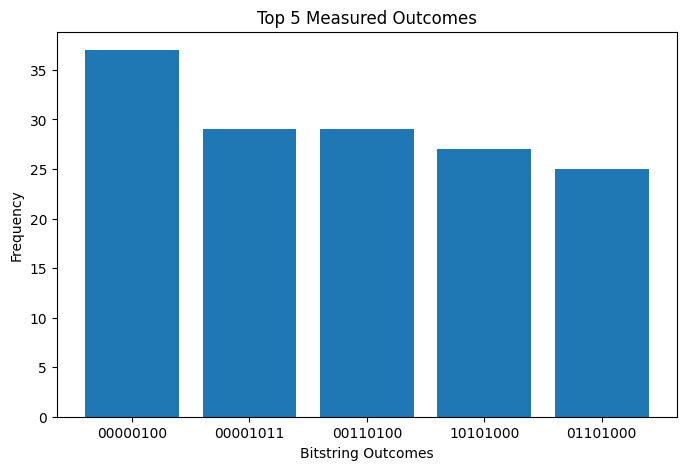

In [2]:
# Plot the histogram
# plot_histogram(counts)
# Sort the outcomes by frequency (highest first) and take the top 5.
top5 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 solutions.
print("Top 5 solutions:")
for bitstr, cnt in top5:
    print(f"{bitstr}: {cnt}")

# Extracting bitstrings and their counts
bitstrings, frequencies = zip(*top5)

# Plot the histogram for the top 5 solutions
plt.figure(figsize=(8, 5))
plt.bar(bitstrings, frequencies)
plt.xlabel("Bitstring Outcomes")
plt.ylabel("Frequency")
plt.title("Top 5 Measured Outcomes")
plt.show()